# Week 1 Recap with Python.

In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

**Measures of Central tendency**
___
- mode
- mean
- median

In [3]:
feature_values = np.random.randint(1, 10, size=50)
feature_values[:5]

array([9, 5, 6, 3, 1])

In [5]:
print(f'mean: {np.mean(feature_values)}')
print(f'median: {np.median(feature_values)}')
print(f'mode: {stats.mode(feature_values)}')

mean: 5.98
median: 6.5
mode: ModeResult(mode=9, count=13)


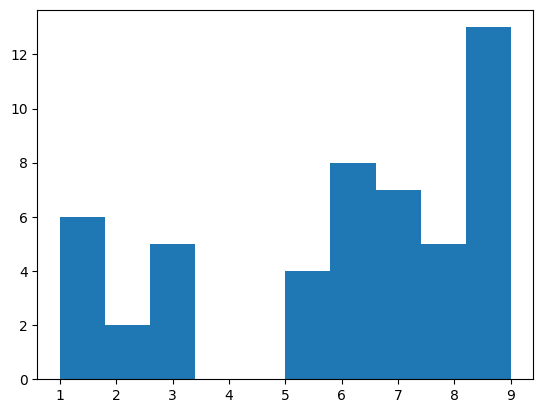

In [7]:
plt.hist(feature_values);

Mean Properties:

$$\sum x_i - \mu = 0$$
$$\mu_{x+c} = \mu_x + c$$
$$\mu_{x*c} = \mu_x * c$$

**Measures Of Variability**

We have few main terms:
- Range  - difference between highest value and lowest
- Variance

In [10]:
# calculate range on that distribution:

R = feature_values.max() - feature_values.min()
R
# it's not really good measure, as it's too sensitive to outliers.

8

In [11]:
# Variance calculation:

0.4579497921200237

Variance formula:

$$D = {\sum (x_i = \mu)^2 \over n}$$
___
for sample:
$$D = {\sum (x_i = \overline x)^2 \over n-1}$$
___

$$sd = \sqrt {D}$$


In [14]:
print(f'Standard Deviation: {np.std(feature_values)}')  # it's sd
print(f'Variance: {np.std(feature_values) ** 2}')

Standard Deviation: 2.7385397568777416
Variance: 7.4996


Quartiles:

Quartiles - 3 points that divide our feature values on 4 equal parts.

Via quartiles we can build box plot:

Box plot describes our distribution:
- Shows outliers
- Shows median (2nd quartile)
- Shows distribution form

It's good to think of a box plot as a plot of our distibution from top view.

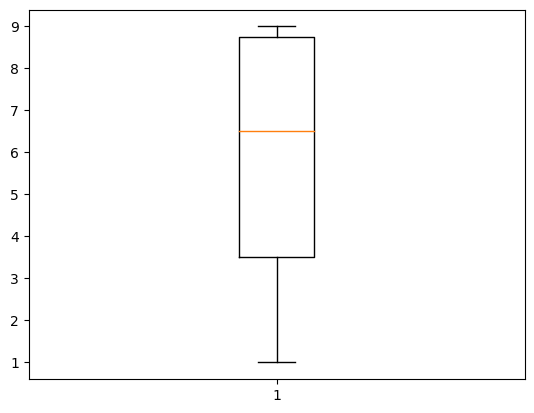

In [16]:
plt.boxplot(feature_values);

Box plot above shows us the following information:
- median is 6.5
- minimum value is 1
- maximum value is 9


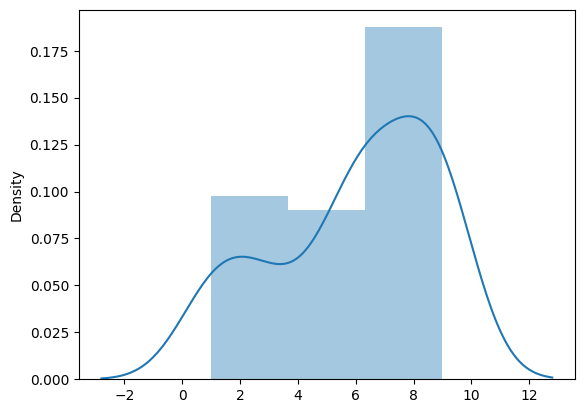

In [24]:
sns.distplot(feature_values);

**Normal Distribution**

Normal or Gaussian distribution:
- Symmetrical
- Unimodal
- Obeys probability rules in it's distribution

In [33]:
normal_distribution = np.random.normal(0, 0.1, 1000)  # mean, std, elements

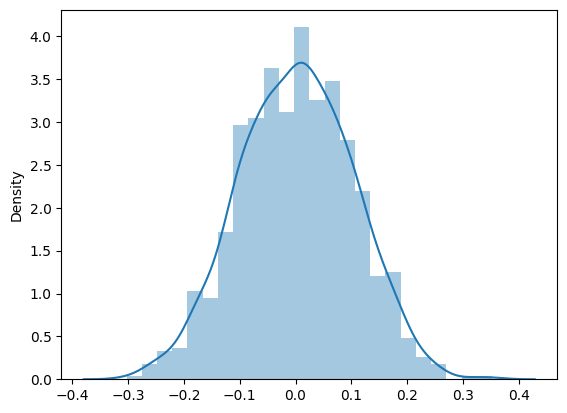

In [34]:
sns.distplot(normal_distribution);

By the way we generated z-scored (standartized) normal distribution.
Standartization is an operation of:

$$Z ={x_i - \overline x \over sd}$$

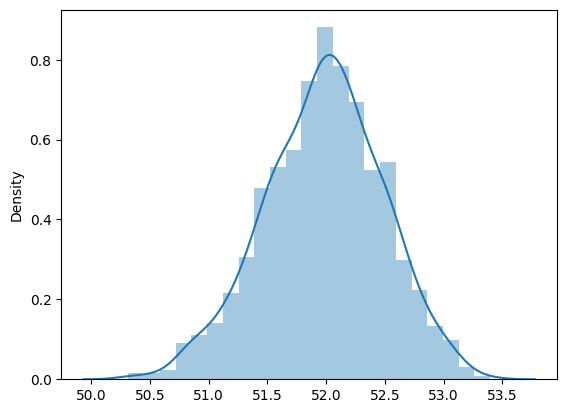

In [36]:
distribution = np.random.normal(52, 0.5, 1000)
sns.distplot(distribution);

In [38]:
standartized = []

for value in distribution:
  standartized.append((value - np.mean(distribution)) / np.std(distribution))

standartized = np.array(standartized)

print(round(np.mean(standartized)))

0


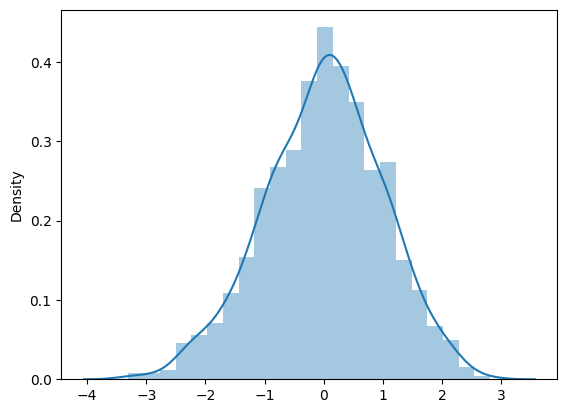

In [40]:
sns.distplot(standartized);

In [41]:
# our distribution remains the shape, but it's mean is 0 and std is 0.1

3 sigmas rule:

<img src='https://raw.githubusercontent.com/KlukvaMors/basic_stat/a3db1e2526a8092d70d988531e8b10ad39ee8f32//img/3-sigma.svg'>


**Central Limit Theorem of Means**

In [43]:
samples = []

for i in range(16):
  sample = []
  for j in range(30):
    sample.append(np.random.choice(distribution))
  samples.append(sample)

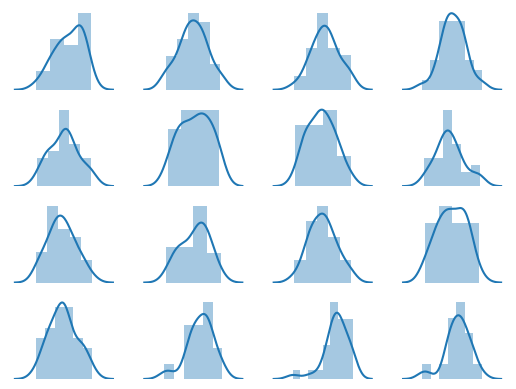

In [46]:
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.axis('off')
  sns.distplot(samples[i])

In [47]:
means = []

for sample in samples:
  means.append(np.mean(sample))


<Axes: ylabel='Density'>

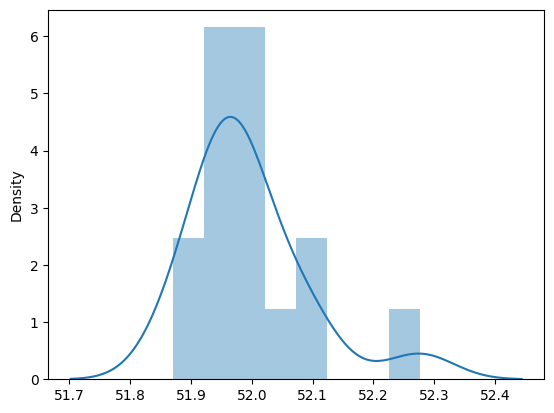

In [49]:
sns.distplot(means)

Okay... I guess there are some little troubles because of random choice (it doesn't exclued repeated objects), but still, our distribution is close to normal and look!
Mean of this distribution = mean of our population (52)

We calculate standard deviation for it as:

$$sd \over \sqrt{n}$$
and we call it standard error.

$$se = {sd \over \sqrt{n}}$$

**Confidence Interval**

When we form a lot of samples we can tell mean of our population pretty precisely (using Central Limit Theorem of Means)
But if we have only one sample, we can use confidence interval

It's calculated like:

$$\mu \pm 1.96\sigma$$

Because we want to let it work for 95% (5% on tail)
We exclude 1 tail (2.5%) and now we have 97.5%

1.96 is just z value (following 3 sigmas rule)

In [51]:
a = 0.95

alpha = (1 - a) / 2  # as we have 2 tails.

print(stats.norm().isf(alpha))  # 1.96 yo!

1.959963984540054


**p value and significance**

When we make research on some feature of sample and we want to generalize it to our population we have two hypothesis:

1. H0 our numbers are not significant
2. H1 our numbers are significant.

To calculate it we assume H0.
Then we build our means distribution.
Calculate Z value for our sample mean.

Then check probability through distribution calculator and if our p-value < 0.05 we can throw H0 away and assume H1, if not: we can't throw H0 away, but we can't also throw H1 away.